In [1]:
import sys
# sys.path.append(r'C:\Users\edwar\Documents\LabStuff\ibllib\brainbox\io')
#sys.path.append(r'C:\Users\IBL\Documents\ibl_analysis\ONE\one')
import matplotlib.pyplot as plt
import numpy as np
from brainbox.io.one import load_wheel_reaction_times
import brainbox.behavior.wheel as wh
from ibllib.io.raw_data_loaders import *
from ibllib.pipes.tasks import *
from ibllib.pipes import *
from ibllib.io.extractors.bpod_trials import *
from one.api import ONE
from one.alf.io import *
from ibllib.io.extractors.base import BaseBpodTrialsExtractor, run_extractor_classes
from ibllib.io.extractors.camera import CameraTimestampsBpod
from ibllib.io.extractors.ephys_fpga import extract_wheel_moves
from ibllib.io.extractors.training_wheel import extract_first_movement_times
#from localAlf import load_wheel_reaction_times_local
from brainbox.behavior.training import *
import scipy.io.wavfile as wavfile
from scipy import signal
from ScanImageTiffReader import ScanImageTiffReader
import json
import ast
import math

In [111]:
session_path = r'Z:\TM_Lab\Edward\Data\iblrig_data\Subjects\_iblrig_test_mouse\2024-09-12\003'
try:
    temp_trial_data = load_object(session_path+'\\alf', 'trials')
except:
    pass
trials, wheel, output_files = extract_all(session_path, save=True)

In [112]:
trials

OrderedDict([('repNum',
              array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
             ('ruleCueTrigger_times',
              array([ 3.925 ,  9.3843, 14.0009, 18.6809, 23.3212, 28.1018, 32.7731,
                     37.4967, 41.9869, 46.7581, 51.4037, 56.6833, 61.5339, 67.9493,
                     72.8398, 77.5904, 82.8295, 87.7498, 93.7557, 99.382 ])),
             ('stimOnTrigger_times',
              array([  4.625 ,  10.0843,  14.7009,  19.3809,  24.0212,  28.8018,
                      33.4731,  38.1967,  42.6869,  47.4581,  52.1037,  57.3833,
                      62.2339,  68.6493,  73.5398,  78.2904,  83.5295,  88.4498,
                      94.4557, 100.082 ])),
             ('itiIn_times',
              array([  7.2536,  11.8534,  16.3867,  21.0701,  25.7818,  30.4869,
                      35.3351,  39.9036,  44.5202,  49.1227,  54.4535,  59.3033,
                      65.8065,  70.5365,  75.3865,  80.5708,  85.6787,  91.4258,
            

In [113]:
trials['table']

,intervals_0,intervals_1,ruleCue_times,ruleCueTrigger_times,response_times,choice,stimOnTrigger_times,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,0.0000,7.753602,0.0462,3.9250,6.2029,1,4.6250,4.8370,0.5,NaN,6.2030,1,3.0,0.5,5.956794,0
1,8.9584,12.353402,9.4153,9.3843,10.8034,-1,10.0843,10.2370,NaN,1.0,10.8035,1,3.0,0.5,10.648794,0
2,13.5551,16.886702,14.0348,14.0009,15.3330,1,14.7009,14.8535,0.5,NaN,15.3331,1,3.0,0.5,15.226794,0
3,18.1048,21.570102,18.7144,18.6809,20.0065,-1,19.3809,19.5368,NaN,0.5,20.0066,1,3.0,0.5,19.895794,0
4,22.8181,26.281801,23.3580,23.3212,24.6817,1,24.0212,24.1536,0.5,NaN,24.6818,1,3.0,0.5,24.647794,0
5,27.4213,30.986902,28.1335,28.1018,29.4275,-1,28.8018,28.8535,NaN,0.5,29.4276,1,3.0,0.5,29.374794,0
6,32.2248,35.835102,32.8091,32.7731,34.2350,1,33.4731,33.6201,1.0,NaN,34.2351,1,3.0,0.5,34.201794,0
7,37.0307,40.403602,37.5287,37.4967,38.8268,1,38.1967,38.2702,0.5,NaN,38.8269,1,3.0,0.5,38.778794,0
8,41.5731,45.020202,42.0202,41.9869,43.4646,-1,42.6869,42.8200,NaN,0.5,43.4647,1,3.0,0.5,43.427794,0
9,46.2109,49.622701,46.7918,46.7581,48.0226,1,47.4581,47.6367,1.0,NaN,48.0227,1,3.0,0.5,47.987794,0


In [13]:
np.array(trials['table']['stimOn_times'])-trials['stimOnTrigger_times']

array([0.212 , 0.1527, 0.1526, 0.1559, 0.1324, 0.0517, 0.147 , 0.0735,
       0.1331, 0.1786, 0.0497, 0.1535, 0.1525, 0.0374, 0.0636, 0.1461,
       0.0571, 0.0533, 0.0476, 0.0542])

In [14]:
np.array(trials['table']['goCue_times'])-trials['goCueTrigger_times']

KeyError: 'goCue_times'

In [33]:
frames_metadata_export_folder = r'I:\A_R2\20240910\arm1'
frames_metadata_export_path = os.path.join(frames_metadata_export_folder, 'ca_img_frames_metadata.json')
try:
    with open(frames_metadata_export_path, 'r') as json_file:
        frames_metadata = json.load(json_file)
except:
    img_path = r'Z:\TM_Lab\Edward\Cerebellum_Imaging\Pcp2-jgcamp8m\A_R2\20240821\arm1\arm1_150sq_1024pix_15hz_etl115_00002.tif'
    reader=ScanImageTiffReader(img_path)
    frames_metadata = []

    with ScanImageTiffReader(img_path) as reader:
        num_frames = reader.shape()[0]  # Assuming the first dimension represents frames
        
        for i in range(num_frames):
            description = reader.description(i)
            frame_metadata = {}  # Dictionary to hold this frame's metadata
            
            for line in description.split('\n'):
                if '=' in line:  # Ensure there's a key-value pair to parse
                    key, value = line.split('=', 1)  # Split by the first '='
                    key = key.strip()
                    
                    try:
                        # Safely evaluate the value string to the appropriate Python data type
                        # This works for numbers, lists, dictionaries, etc.
                        value = ast.literal_eval(value.strip())
                    except (ValueError, SyntaxError):
                        # If evaluation fails, keep the value as a string
                        value = value.strip()
                    
                    frame_metadata[key] = value
            
            frames_metadata.append(frame_metadata)
        
    with open(frames_metadata_export_path, 'w') as json_file:
        json.dump(frames_metadata, json_file)


In [34]:
auxTrigger = []
frame_time = []
trigger_frame_num = []
# Iterate through each frame's metadata
if 'arm1' in img_path:
    trig_chan = 'auxTrigger0'
elif 'arm2' in img_path:
    trig_chan = 'auxTrigger1'
for frame_metadata in frames_metadata:
    frame_time.append(frame_metadata['frameTimestamps_sec'])
    # Check if 'auxTrigger0' exists and is not empty
    if trig_chan in frame_metadata and frame_metadata[trig_chan]:
        # Extend the all_auxTrigger0 list with the numbers from this frame's auxTrigger0
        if not auxTrigger:
            pass
        elif frame_metadata['frameNumbers'] in trigger_frame_num or frame_metadata['frameNumbers'] < max(trigger_frame_num)+5:
            continue
        print(frame_metadata)
        if type(frame_metadata[trig_chan]) == list:
            first_float = frame_metadata[trig_chan][0]
        elif type(frame_metadata[trig_chan]) == str:
            match = re.search(r'\d+\.\d+', frame_metadata['auxTrigger1'])
            if match:
                first_float = float(match.group())
            else:
                print(f"Missing trigger for framenum {frame_metadata['frameNumbers']}")
        else:
            print(f"cannot parse trigger for framenum {frame_metadata['frameNumbers']}")
        auxTrigger.append(first_float)
        trigger_frame_num.append(frame_metadata['frameNumbers'])
auxTrigger = np.array(auxTrigger)
len(auxTrigger)

{'frameNumbers': 135, 'acquisitionNumbers': 1, 'frameNumberAcquisition': 135, 'frameTimestamps_sec': 8.80712349, 'acqTriggerTimestamps_sec': -1.0, 'nextFileMarkerTimestamps_sec': -1.0, 'endOfAcquisition': 0, 'endOfAcquisitionMode': 0, 'dcOverVoltage': 0, 'epoch': '[2024  9 10 14 30 41.019]', 'auxTrigger0': [8.87250305, 8.87252289, 8.872571175, 8.87266959], 'auxTrigger1': [], 'auxTrigger2': [], 'auxTrigger3': [], 'I2CData': {}}
{'frameNumbers': 269, 'acquisitionNumbers': 1, 'frameNumberAcquisition': 269, 'frameTimestamps_sec': 17.61575914, 'acqTriggerTimestamps_sec': -1.0, 'nextFileMarkerTimestamps_sec': -1.0, 'endOfAcquisition': 0, 'endOfAcquisitionMode': 0, 'dcOverVoltage': 0, 'epoch': '[2024  9 10 14 30 41.019]', 'auxTrigger0': [17.64249801, 17.64251789, 17.642566125, 17.64266454, 17.64287368, 17.6728111, 17.673004055], 'auxTrigger1': [], 'auxTrigger2': [], 'auxTrigger3': [], 'I2CData': {}}
{'frameNumbers': 423, 'acquisitionNumbers': 1, 'frameNumberAcquisition': 423, 'frameTimestamps

295

In [36]:
ruleCue_times = np.array(trials['table']['ruleCue_times'])
assert(all(np.diff(ruleCue_times)-np.diff(auxTrigger[:len(ruleCue_times)]) < 0.001))


In [8]:
auxTrigger = auxTrigger[:len(ruleCue_times)]

In [42]:
print(f'first go cue in image: {auxTrigger[0]}')
print(f"first go cue in statemachine table: {trials['table']['ruleCue_times'][0]}")

first go cue in image: 8.87250305
first go cue in statemachine table: 5.836900000000007


In [43]:

statemachine_offset = auxTrigger[0]-trials['table']['ruleCue_times'][0] # time in s that state machine is leading the first goCueTime


In [40]:
trials['table']

,intervals_0,intervals_1,ruleCue_times,ruleCueTrigger_times,response_times,choice,stimOnTrigger_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,0.000000,12.397102,5.836900,5.434400,10.797000,1,8.518700,0.5,NaN,10.797100,1,3.0,0.50,10.563577,0
1,13.708200,22.450502,14.606900,14.177300,20.850400,-1,15.177300,NaN,1.0,20.850500,1,3.0,0.50,20.746577,0
2,23.696001,27.490202,24.708201,24.278701,25.890101,-1,25.278701,NaN,1.0,25.890201,1,3.0,0.50,25.794577,0
3,28.732300,33.002602,30.286700,29.852400,31.402500,1,30.852400,0.5,NaN,31.402600,1,3.0,0.50,31.177577,0
4,34.302201,38.865202,36.332101,35.901501,37.265101,-1,36.901501,NaN,1.0,37.265201,1,3.0,0.50,37.092577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2544.646699,2561.648201,2545.699699,2545.268099,2558.048099,1,2546.268099,NaN,1.0,2545.757699,-1,0.0,0.25,NaN,0
290,2562.949199,2567.439401,2563.815999,2563.381799,2565.839299,1,2564.901299,0.0,NaN,2565.839399,1,3.0,0.45,2565.408576,1
291,2568.680099,2581.029201,2570.395499,2569.967699,2577.429099,1,2575.806999,NaN,0.0,2570.462499,-1,0.0,0.50,NaN,1
292,2582.344400,2588.319001,2583.218500,2582.795000,2584.718900,-1,2583.795000,0.0,NaN,2583.285400,-1,0.0,0.45,NaN,1


In [38]:
def find_closest_index(value, list_of_values):
    # Find the index of the closest value in list_of_values
    return np.abs(np.array(list_of_values) - value).argmin()


In [37]:

table_for_img = trials['table'].copy()
for col in table_for_img.columns:
    if 'times' in col or 'intervals' in col:
        table_for_img[col] = table_for_img[col].add(statemachine_offset)
        table_for_img[col] = table_for_img[col].apply(lambda x: find_closest_index(x, frame_time))
        table_for_img[col] = table_for_img[col].apply(lambda x: np.nan if x == 0 else x)

NameError: name 'statemachine_offset' is not defined

In [45]:
table_for_img

,intervals_0,intervals_1,ruleCue_times,ruleCueTrigger_times,response_times,choice,stimOnTrigger_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,46,235,135,129,210,1,176,0.5,NaN,210,1,3.0,0.50,207.0,0
1,255,388,268,262,363,-1,277,NaN,1.0,363,1,3.0,0.50,362.0,0
2,407,464,422,416,440,-1,431,NaN,1.0,440,1,3.0,0.50,439.0,0
3,483,548,507,500,524,1,516,0.5,NaN,524,1,3.0,0.50,520.0,0
4,568,637,599,592,613,-1,607,NaN,1.0,613,1,3.0,0.50,610.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,38729,38987,38745,38738,38933,1,38753,NaN,1.0,38746,-1,0.0,0.25,NaN,0
290,39007,39075,39020,39014,39051,1,39037,0.0,NaN,39051,1,3.0,0.45,39044.0,1
291,39094,39282,39120,39114,39227,1,39202,NaN,0.0,39121,-1,0.0,0.50,NaN,1
292,39302,39393,39315,39309,39338,-1,39324,0.0,NaN,39316,-1,0.0,0.45,NaN,1


In [46]:
#table_for_img = table_for_img.loc[valid_trials]

table_for_img.to_csv(frames_metadata_export_folder+'\\table_for_img.csv', index=False)

AUDIO

In [102]:
audio_filepath = os.path.join(session_path, 'raw_behavior_data', '_iblrig_micData.raw.wav')
sample_rate, audio_data = wavfile.read(audio_filepath)

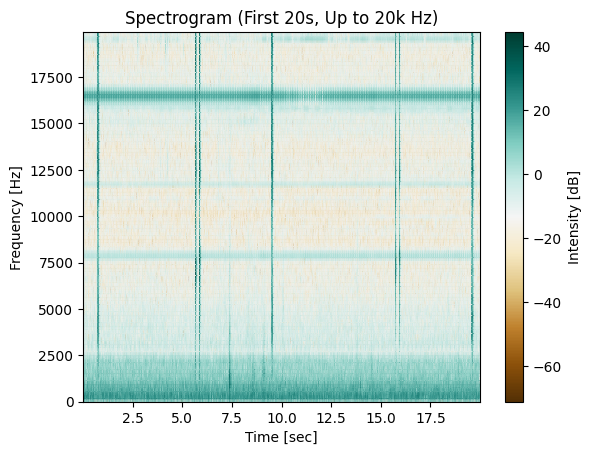

In [104]:
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=1024, noverlap=512)

# Limit the frequencies to 20k Hz (20000 Hz)
max_frequency = 20000
freq_limit = frequencies <= max_frequency

# Apply the frequency limit to the data
frequencies = frequencies[freq_limit]
Sxx = Sxx[freq_limit, :]

# Limit the time to the first 20 seconds
max_time = 20  # First 20 seconds
time_limit = times <= max_time

# Apply the time limit to the data
times = times[time_limit]
Sxx = Sxx[:, time_limit]

# Plot the spectrogram with the 'parula' colormap
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='BrBG')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram (First 20s, Up to 20k Hz)')
plt.colorbar(label='Intensity [dB]')
plt.show()

In [103]:
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=1024, noverlap=512)

# Convert the spectrogram to decibels for better visualization and peak detection
Sxx_dB = 10 * np.log10(Sxx)

In [83]:


# Define your frequency bins (in Hz)
frequency_bins = [
    (5000, 8000),   # 5kHz to 8kHz
]

# Initialize list to store the averaged intensities and detected peaks
averaged_intensities = []
peaks_in_bins = []

# Loop through each frequency bin
for freq_range in frequency_bins:
    # Create a mask to select the frequencies within the current bin
    freq_mask = (frequencies >= freq_range[0]) & (frequencies <= freq_range[1])

    # Average the intensity across the selected frequency range (frequency axis)
    avg_intensity = np.mean(Sxx_dB[freq_mask, :], axis=0)
    
    # Find peaks in the averaged intensity across time
    peaks, properties = signal.find_peaks(avg_intensity, height=20)  # Adjust 'height' as needed

    # Store the results
    averaged_intensities.append(avg_intensity)
    peaks_in_bins.append(peaks)

# Set a time difference threshold (in seconds)
time_threshold = 0.2

# Find consecutive peaks that are ~0.2s apart
consecutive_peaks_times = []

for peaks, freq_range in zip(peaks_in_bins, frequency_bins):
    # Calculate the time difference between consecutive peaks
    time_diffs = np.diff(times[peaks])
    
    # Find pairs of peaks where the time difference is close to 0.2 seconds
    consecutive_pairs = np.where((time_diffs >= time_threshold - 0.03) & (time_diffs <= time_threshold + 0.03))[0]
    
    # For each pair, store the time of the first peak
    for pair_idx in consecutive_pairs:
        first_peak_time = times[peaks[pair_idx]]
        consecutive_peaks_times.append(first_peak_time)

# Output the times of occurrence of the first peak in each pair
print("Times of first peaks in consecutive pairs ~0.2s apart:")
print(consecutive_peaks_times)
print(len(consecutive_peaks_times))

Times of first peaks in consecutive pairs ~0.2s apart:
[11.54048, 39.74656, 50.23488, 59.64288, 68.39552, 112.89856, 123.1744, 140.19584, 151.85664, 167.0272, 177.2032, 182.23872, 228.3008, 242.20672, 273.96096, 280.25088, 307.8784, 329.71264, 342.30272, 377.32864, 434.49088, 450.89536, 467.8528, 474.31424, 479.31392, 486.30016, 504.08448, 519.90016, 530.048, 556.8384, 569.06752, 580.55168, 602.6496, 614.09024, 653.0432, 667.42528, 677.39136, 684.41088, 689.8176, 707.38432, 718.30784, 765.63456, 781.07136, 834.08896, 871.45728, 883.8656, 896.09216, 915.97824, 925.12256, 931.29984, 960.56576, 968.53248, 999.76704, 1013.824, 1116.08576, 1134.24896, 1154.0352, 1181.46048, 1189.19936, 1198.46912, 1211.54304, 1219.48416, 1238.7072, 1253.31456, 1261.00736, 1277.78304, 1283.70944, 1303.27296, 1309.26592, 1343.95904, 1354.34752, 1359.81568, 1384.68864, 1416.33024, 1440.37888, 1456.35328, 1461.20448, 1473.28, 1493.67808, 1508.24704, 1534.05952, 1539.0848, 1558.67904, 1565.65504, 1575.8848, 1594

In [97]:
# Step 1: Define the frequency range of interest (for example, 2kHz to 3kHz)
min_frequency = 5000
max_frequency = 15000

# Step 2: Filter the frequencies to include only the desired range
freq_mask = (frequencies >= min_frequency) & (frequencies <= max_frequency)

# Step 3: Average the intensity over the selected frequency range
avg_intensity_in_range = np.mean(Sxx_dB[freq_mask, :], axis=0)

# Step 4: Find peaks in the averaged intensity across time
peaks, properties = signal.find_peaks(avg_intensity_in_range, height=10)  # Adjust 'height' as needed

# Step 5: Identify periods where peaks are exactly 0.1s apart
peak_times = times[peaks]
time_diffs = np.diff(peak_times)

# Set threshold to find periods of exactly 0.1 seconds
exact_duration = 0.1
exact_peak_pairs = []

# Look for pairs of peaks where the difference is exactly 0.1 seconds
for i, time_diff in enumerate(time_diffs):
    if abs(time_diff - exact_duration) <= 0.02:  # Allowing a small tolerance (0.01s)
        exact_peak_pairs.append((peak_times[i], peak_times[i + 1]))

# Output periods with peaks exactly 0.1 seconds apart
print("Periods with peaks exactly 0.1 seconds apart:")
for pair in exact_peak_pairs:
    print(f"From {pair[0]:.2f}s to {pair[1]:.2f}s")

Periods with peaks exactly 0.1 seconds apart:


First peak in 12-15kHz range (within 10s) occurs at 3.35 seconds


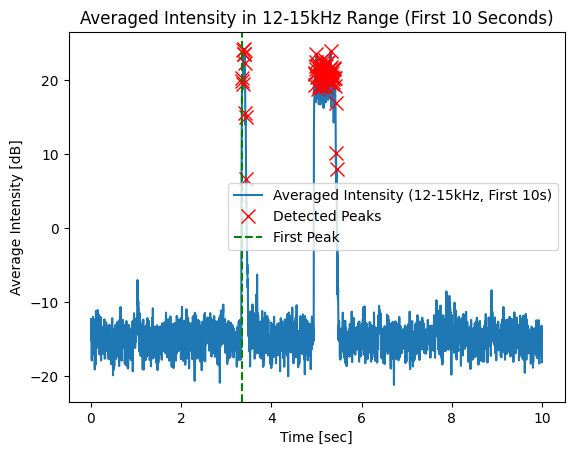

In [90]:
min_frequency = 12000
max_frequency = 15000

# Step 2: Filter the frequencies to include only the 12-15kHz range
freq_mask = (frequencies >= min_frequency) & (frequencies <= max_frequency)

# Step 3: Average the intensity over the selected frequency range (12-15kHz)
avg_intensity_12_15khz = np.mean(Sxx_dB[freq_mask, :], axis=0)

# Step 4: Limit to the first 10 seconds
time_limit = 10
time_mask = times <= time_limit

# Apply the time mask to the times and intensity
times_10sec = times[time_mask]
avg_intensity_12_15khz_10sec = avg_intensity_12_15khz[time_mask]

# Step 5: Find peaks in the averaged intensity for the first 10 seconds
peaks, properties = signal.find_peaks(avg_intensity_12_15khz_10sec, height=0)  # Adjust 'height' threshold as needed

# Step 6: Find the time of the first peak (if any peaks were found)
if len(peaks) > 0:
    first_peak_time = times_10sec[peaks[0]]  # Time of the first peak
    print(f"First peak in 12-15kHz range (within 10s) occurs at {first_peak_time:.2f} seconds")
else:
    print("No peaks found in the 12-15kHz range within the first 10 seconds")

# Plot only the first 10 seconds of averaged intensity and highlight the first peak
plt.plot(times_10sec, avg_intensity_12_15khz_10sec, label="Averaged Intensity (12-15kHz, First 10s)")
plt.plot(times_10sec[peaks], avg_intensity_12_15khz_10sec[peaks], 'rx', markersize=10, label="Detected Peaks")
if len(peaks) > 0:
    plt.axvline(x=first_peak_time, color='g', linestyle='--', label='First Peak')

plt.title('Averaged Intensity in 12-15kHz Range (First 10 Seconds)')
plt.xlabel('Time [sec]')
plt.ylabel('Average Intensity [dB]')
plt.legend()
plt.show()

In [84]:
np.sum(trials['table']['feedbackType']==1)

159

In [69]:
assert(len(consecutive_peaks_times)==np.sum(trials['table']['feedbackType']==1))

AssertionError: 

In [85]:
trials['table']

,intervals_0,intervals_1,ruleCue_times,ruleCueTrigger_times,response_times,choice,stimOnTrigger_times,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,0.000000,13.205101,8.433300,8.011900,9.605000,1,9.011900,7.900200,NaN,1.0,8.486000,-1,0.0,0.50,NaN,0
1,14.541700,18.217401,15.509500,15.076500,16.617300,-1,16.076500,NaN,NaN,1.0,16.617400,1,3.0,0.95,16.50229,0
2,19.444899,31.548301,20.525099,20.091599,27.948199,-1,26.989199,23.787299,0.5,NaN,20.583899,-1,0.0,0.50,NaN,0
3,32.851199,40.037601,33.849999,33.419599,36.437499,-1,35.683899,36.950499,0.5,NaN,33.908799,-1,0.0,0.95,NaN,0
4,41.370099,46.424501,43.222299,42.792299,44.824399,1,44.281299,NaN,0.5,NaN,44.824499,1,3.0,0.95,44.70829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2840.964998,2847.459000,2841.927498,2841.502498,2843.858898,1,2842.502498,2842.008698,NaN,0.0,2841.994198,-1,0.0,0.35,NaN,1
300,2848.679598,2853.148801,2849.656298,2849.225698,2851.548698,1,2850.225698,2849.871798,1.0,NaN,2851.548798,1,3.0,0.50,2850.62929,0
301,2854.366599,2858.885300,2855.350399,2854.923099,2857.285199,1,2855.923099,NaN,1.0,NaN,2857.285299,1,3.0,0.50,2857.09129,0
302,2860.095898,2866.313400,2861.005598,2860.578698,2862.713298,1,2861.578698,2861.940698,NaN,0.5,2861.063398,-1,0.0,0.50,NaN,0


In [91]:
print(np.diff(trials['table'].loc[trials['table']['feedbackType']==1, 'feedback_times'])[140:])
print(np.diff(consecutive_peaks_times)[140:])

[31.8778   30.5236   67.430001  8.9467   12.834299  5.4771   11.165101
 21.128599  5.724301 32.4752   46.320199  5.2243    4.992501 33.591199
  5.2793   23.246501 22.713399  5.736501]
[ 8.93184 12.83328  5.4912  11.16416 21.12512  5.72416 32.45568 46.33344
  5.20704  5.00992 33.58976  5.27872 23.2448  22.70976  5.73696]


In [92]:
rewardTrigger_times = np.array(trials['table'].loc[trials['table']['feedbackType']==1, 'feedback_times'])
rewardValveSound_times = consecutive_peaks_times

In [98]:
rewardTrigger_times

array([  16.6174  ,   44.824499,   55.306599,   64.7232  ,   73.466399,
        117.974199,  128.249999,  145.274499,  156.9433  ,  172.105599,
        182.2837  ,  187.320199,  233.394099,  247.292799,  279.048499,
        285.346699,  312.980799,  334.816399,  347.4063  ,  382.440699,
        439.599399,  456.002999,  472.962699,  479.414299,  484.422899,
        491.4105  ,  509.1973  ,  525.0009  ,  535.160999,  561.954799,
        574.184199,  585.667599,  607.767899,  619.211299,  658.169   ,
        672.551199,  682.515699,  689.5359  ,  694.942599,  712.511298,
        723.436499,  770.771099,  786.202799,  839.225898,  876.600499,
        889.009598,  901.246598,  921.124598,  930.267598,  936.440699,
        965.715398,  973.682898, 1004.913798, 1018.971998, 1121.252799,
       1139.416298, 1159.209199, 1186.620598, 1194.371498, 1203.626798,
       1216.721399, 1224.655298, 1243.880299, 1258.491499, 1266.173399,
       1282.966098, 1288.885298, 1308.449598, 1314.442899, 1349.

In [94]:
corrected_rewardValveSound_times = rewardValveSound_times + trials['table']['ruleCue_times'][0]-first_peak_time

corrected_rewardValveSound_times

array([  16.6253 ,   44.83138,   55.3197 ,   64.7277 ,   73.48034,
        117.98338,  128.25922,  145.28066,  156.94146,  172.11202,
        182.28802,  187.32354,  233.38562,  247.29154,  279.04578,
        285.3357 ,  312.96322,  334.79746,  347.38754,  382.41346,
        439.5757 ,  455.98018,  472.93762,  479.39906,  484.39874,
        491.38498,  509.1693 ,  524.98498,  535.13282,  561.92322,
        574.15234,  585.6365 ,  607.73442,  619.17506,  658.12802,
        672.5101 ,  682.47618,  689.4957 ,  694.90242,  712.46914,
        723.39266,  770.71938,  786.15618,  839.17378,  876.5421 ,
        888.95042,  901.17698,  921.06306,  930.20738,  936.38466,
        965.65058,  973.6173 , 1004.85186, 1018.90882, 1121.17058,
       1139.33378, 1159.12002, 1186.5453 , 1194.28418, 1203.55394,
       1216.62786, 1224.56898, 1243.79202, 1258.39938, 1266.09218,
       1282.86786, 1288.79426, 1308.35778, 1314.35074, 1349.04386,
       1359.43234, 1364.9005 , 1389.77346, 1421.41506, 1445.46

In [100]:
found_rewardValve_ind = [find_closest_index(corrected_rewardValveSound_times[i], rewardTrigger_times) for i in range(len(corrected_rewardValveSound_times))]
print(found_rewardValve_ind)
corrected_rewardValveSound_times-rewardTrigger_times[found_rewardValve_ind]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]


array([ 0.0079  ,  0.006881,  0.013101,  0.0045  ,  0.013941,  0.009181,
        0.009221,  0.006161, -0.00184 ,  0.006421,  0.00432 ,  0.003341,
       -0.008479, -0.001259, -0.002719, -0.010999, -0.017579, -0.018939,
       -0.01876 , -0.027239, -0.023699, -0.022819, -0.025079, -0.015239,
       -0.024159, -0.02552 , -0.028   , -0.01592 , -0.028179, -0.031579,
       -0.031859, -0.031099, -0.033479, -0.036239, -0.04098 , -0.041099,
       -0.039519, -0.0402  , -0.040179, -0.042158, -0.043839, -0.051719,
       -0.046619, -0.052118, -0.058399, -0.059178, -0.069618, -0.061538,
       -0.060218, -0.056039, -0.064818, -0.065598, -0.061938, -0.063178,
       -0.082219, -0.082518, -0.089179, -0.075298, -0.087318, -0.072858,
       -0.093539, -0.086318, -0.088279, -0.092119, -0.081219, -0.098238,
       -0.091038, -0.091818, -0.092159, -0.099238, -0.103958, -0.100098,
       -0.098239, -0.092739, -0.105899, -0.095498, -0.096298, -0.096878,
       -0.098498, -0.107738, -0.094958, -0.113278, 

In [56]:
print(corrected_rewardValveSound_times[160:])
print(rewardTrigger_times[found_rewardValve_ind][160:])

[2418.42698 2423.75946 2439.20138 2444.73354 2470.84042 2495.17066
 2501.16874 2506.19146 2512.22538 2517.13546 2522.84426 2528.6273
 2534.42058 2565.64746]
[2418.602499 2423.9411   2439.384999 2444.9172   2471.016899 2495.348999
 2501.3544   2506.3786   2512.413699 2517.3245   2523.033099 2528.815599
 2534.610699 2565.839399]


In [33]:
cam_session_path = r'Z:\TM_Lab\Edward\Data\iblrig_data\Subjects\A_R2\2024-09-10\001'
#cam_session_path = r'Z:\TM_Lab\Edward\Data\iblrig_data\Subjects\AG_R3\2023-11-14\001'
cam_frame_data = load_camera_frameData(cam_session_path, camera = 'left')
cam_frame_count, cam_gpio =  load_embedded_frame_data(cam_session_path, label='left', raw=False)

In [26]:
embed_frame_counter = np.asarray(cam_frame_data['embeddedFrameCounter'])
embed_ts = np.asarray(cam_frame_data['embeddedTimeStamp'])

In [27]:
cam_frame_data

,Timestamp,embeddedTimeStamp,embeddedFrameCounter,embeddedGPIOPinState
0,0.000000,0.000000,0,"[False, True, False, True]"
1,0.035840,0.033125,2,"[False, True, False, True]"
2,0.037837,0.049625,3,"[False, True, False, True]"
3,0.054669,0.066250,4,"[False, True, False, True]"
4,0.071142,0.082750,5,"[False, True, False, True]"
...,...,...,...,...
161676,2677.643546,2677.355375,161677,"[False, True, False, True]"
161677,2677.660186,2677.372000,161678,"[False, True, False, True]"
161678,2677.676838,2677.388500,161679,"[False, True, False, True]"
161679,2677.694067,2677.405125,161680,"[False, True, False, True]"


In [34]:
base = [CameraTimestampsBpod]
bpod_trials = rawio.load_data(cam_session_path, task_collection='raw_behavior_data')
settings = rawio.load_settings(cam_session_path, task_collection='raw_behavior_data')
# out, fil = run_extractor_classes(base, save=False, session_path=cam_session_path, bpod_trials=bpod_trials, settings=settings,
#                                      task_collection='raw_behavior_data')

In [32]:
bpod_trials

NameError: name 'bpod_trials' is not defined

In [29]:
cam_start_bpod_time = bpod_trials[0]['behavior_data']['Events timestamps']['Port1In'][0]-bpod_trials[0]['behavior_data']['Trial start timestamp']
cam_start_bpod_time

4.75

In [37]:
goCue = np.array([tr['behavior_data']['States timestamps']
                            ['rule_on'] for tr in bpod_trials])

In [52]:
bpod_trials[0]['behavior_data']

{'Bpod start timestamp': 0.0,
 'Trial start timestamp': 0.0,
 'Trial end timestamp': 12.397101999999997,
 'States timestamps': {'trial_start': [[0.0, 4.75]],
  'reset_rotary_encoder': [[4.75, 4.750100000000003]],
  'quiescent_period': [[4.750100000000003, 5.434400000000004]],
  'rule_on': [[5.434400000000004, 5.534399999999998]],
  'quiescent_period2': [[5.534399999999998, 5.905200000000001],
   [5.905300000000004, 5.943800000000003],
   [5.943900000000006, 5.987299999999998],
   [5.987400000000001, 6.698900000000002],
   [6.699000000000005, 7.067799999999998],
   [7.067900000000002, 7.085500000000003],
   [7.085600000000007, 7.097299999999997],
   [7.0974, 7.1066999999999965],
   [7.1068, 7.115000000000002],
   [7.115100000000005, 7.122899999999994],
   [7.1229999999999976, 7.130699999999997],
   [7.130800000000001, 7.137999999999998],
   [7.138100000000001, 7.1449],
   [7.145000000000003, 7.151699999999998],
   [7.1518000000000015, 7.158200000000001],
   [7.158300000000004, 7.1644999

In [53]:
bpod_trials[0]['behavior_data']['Events timestamps']

{'Port1In': [4.75,
  4.766600000000004,
  4.7830999999999975,
  4.799700000000001,
  4.816200000000002,
  4.832799999999999,
  4.8492999999999995,
  4.8659000000000034,
  4.8825,
  4.899000000000001,
  4.915599999999998,
  4.932099999999998,
  4.948700000000002,
  4.965299999999999,
  4.9818,
  4.998399999999997,
  5.014899999999997,
  5.031500000000001,
  5.048099999999998,
  5.064599999999999,
  5.081200000000003,
  5.097700000000003,
  5.1143,
  5.130900000000004,
  5.1473999999999975,
  5.1640000000000015,
  5.180500000000002,
  5.197099999999999,
  5.213700000000003,
  5.2302000000000035,
  5.2468,
  5.263300000000001,
  5.279899999999998,
  5.296500000000002,
  5.312999999999995,
  5.329600000000006,
  5.3461,
  5.362699999999997,
  5.3792999999999935,
  5.395800000000001,
  5.412399999999998,
  5.428900000000006,
  5.445500000000003,
  5.4620999999999995,
  5.478599999999993,
  5.495200000000004,
  5.511699999999998,
  5.528299999999994,
  5.544800000000002,
  5.561399999999999,

In [68]:
stim_on_state = np.array([tr['behavior_data']['States timestamps']
                                 ['stim_on'][0] for tr in bpod_trials])
stimOn_trigger_times = stim_on_state[:, 0].T
ruleCue_trigger_times = np.array([tr['behavior_data']['States timestamps']
                            ['rule_on'][0][0] for tr in bpod_trials])
stimOn_times = ruleCue_times + stimOn_trigger_times-ruleCue_trigger_times
stimOn_times-stimOn_trigger_times

array([0.4025, 0.4296, 0.4295, 0.4343, 0.4306, 0.4274, 0.4371, 0.4354,
       0.4383, 0.4302, 0.432 , 0.4356, 0.439 , 0.4369, 0.4365, 0.4373,
       0.4295, 0.437 , 0.4359, 0.4309, 0.441 , 0.437 , 0.44  , 0.4342,
       0.431 , 0.4361, 0.4352, 0.4345, 0.434 , 0.4375, 0.4288, 0.4283,
       0.4312, 0.4367, 0.4291, 0.4331, 0.432 , 0.4335, 0.436 , 0.4317,
       0.4345, 0.4286, 0.4341, 0.4303, 0.4458, 0.4337, 0.4272, 0.4395,
       0.44  , 0.4343, 0.439 , 0.435 , 0.4363, 0.4318, 0.4365, 0.4363,
       0.4367, 0.4277, 0.4317, 0.4325, 0.4262, 0.4303, 0.4317, 0.4347,
       0.4337, 0.4272, 0.4327, 0.431 , 0.4355, 0.4297, 0.4332, 0.432 ,
       0.4274, 0.4335, 0.4339, 0.4272, 0.4333, 0.4335, 0.4334, 0.4258,
       0.4287, 0.4326, 0.4376, 0.4274, 0.4313, 0.4362, 0.4288, 0.4337,
       0.432 , 0.4312, 0.4329, 0.4257, 0.4274, 0.4364, 0.4305, 0.4273,
       0.4334, 0.428 , 0.4261, 0.4287, 0.4255, 0.4283, 0.4281, 0.4328,
       0.4304, 0.436 , 0.4304, 0.4314, 0.4274, 0.4245, 0.4329, 0.4318,
      

In [70]:
feedback_trigger_times = np.array(trials['table']['feedback_times'])
feedback_times = ruleCue_times + feedback_trigger_times-ruleCue_trigger_times
feedback_times-feedback_trigger_times

array([0.4025, 0.4296, 0.4295, 0.4343, 0.4306, 0.4274, 0.4371, 0.4354,
       0.4383, 0.4302, 0.432 , 0.4356, 0.439 , 0.4369, 0.4365, 0.4373,
       0.4295, 0.437 , 0.4359, 0.4309, 0.441 , 0.437 , 0.44  , 0.4342,
       0.431 , 0.4361, 0.4352, 0.4345, 0.434 , 0.4375, 0.4288, 0.4283,
       0.4312, 0.4367, 0.4291, 0.4331, 0.432 , 0.4335, 0.436 , 0.4317,
       0.4345, 0.4286, 0.4341, 0.4303, 0.4458, 0.4337, 0.4272, 0.4395,
       0.44  , 0.4343, 0.439 , 0.435 , 0.4363, 0.4318, 0.4365, 0.4363,
       0.4367, 0.4277, 0.4317, 0.4325, 0.4262, 0.4303, 0.4317, 0.4347,
       0.4337, 0.4272, 0.4327, 0.431 , 0.4355, 0.4297, 0.4332, 0.432 ,
       0.4274, 0.4335, 0.4339, 0.4272, 0.4333, 0.4335, 0.4334, 0.4258,
       0.4287, 0.4326, 0.4376, 0.4274, 0.4313, 0.4362, 0.4288, 0.4337,
       0.432 , 0.4312, 0.4329, 0.4257, 0.4274, 0.4364, 0.4305, 0.4273,
       0.4334, 0.428 , 0.4261, 0.4287, 0.4255, 0.4283, 0.4281, 0.4328,
       0.4304, 0.436 , 0.4304, 0.4314, 0.4274, 0.4245, 0.4329, 0.4318,
      

In [72]:
trials['table']

,intervals_0,intervals_1,ruleCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,0.000000,12.397102,5.836900,10.797000,1,9.769700,0.5,NaN,10.797100,1,3.0,0.50,10.563577,0
1,13.708200,22.450502,14.606900,20.850400,-1,17.064700,NaN,1.0,20.850500,1,3.0,0.50,20.746577,0
2,23.696001,27.490202,24.708201,25.890101,-1,NaN,NaN,1.0,25.890201,1,3.0,0.50,25.794577,0
3,28.732300,33.002602,30.286700,31.402500,1,NaN,0.5,NaN,31.402600,1,3.0,0.50,31.177577,0
4,34.302201,38.865202,36.332101,37.265101,-1,36.520501,NaN,1.0,37.265201,1,3.0,0.50,37.092577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2544.646699,2561.648201,2545.699699,2558.048099,1,2545.705399,NaN,1.0,2545.757699,-1,0.0,0.25,NaN,0
290,2562.949199,2567.439401,2563.815999,2565.839299,1,2563.492899,0.0,NaN,2565.839399,1,3.0,0.45,2565.408576,1
291,2568.680099,2581.029201,2570.395499,2577.429099,1,2568.753699,NaN,0.0,2570.462499,-1,0.0,0.50,NaN,1
292,2582.344400,2588.319001,2583.218500,2584.718900,-1,2582.785300,0.0,NaN,2583.285400,-1,0.0,0.45,NaN,1


In [73]:
ruleCue_trigger_times

array([   5.4344  ,   14.1773  ,   24.278701,   29.8524  ,   35.901501,
         42.8813  ,   48.5067  ,   58.6533  ,   65.949601,   75.277201,
         82.852401,   92.2521  ,  100.6594  ,  108.5153  ,  115.200801,
        122.1978  ,  126.903701,  135.4634  ,  145.1582  ,  151.824   ,
        160.482   ,  166.5268  ,  173.168901,  180.5455  ,  187.0768  ,
        204.6158  ,  212.032401,  220.8879  ,  227.470301,  234.4278  ,
        239.6336  ,  251.180901,  259.769301,  267.5655  ,  277.569901,
        286.351   ,  293.5398  ,  301.8007  ,  310.2757  ,  318.123001,
        324.3011  ,  333.767   ,  343.3438  ,  352.0081  ,  357.665001,
        366.0366  ,  373.1711  ,  378.6199  ,  387.8512  ,  394.747801,
        403.799101,  409.8872  ,  417.2467  ,  428.946101,  439.8107  ,
        451.663601,  461.0169  ,  473.1639  ,  478.4078  ,  487.255   ,
        494.9716  ,  500.5821  ,  505.978601,  510.788   ,  517.2047  ,
        527.134001,  535.7026  ,  540.5211  ,  559.155601,  568.

In [32]:
def find_closest_index(value, list_of_values):
    # Find the index of the closest value in list_of_values
    return np.abs(np.array(list_of_values) - value).argmin()

table_for_video = trials['table'].copy()
for col in table_for_video.columns:
    if 'times' in col or 'intervals' in col:
        table_for_video[col] = table_for_video[col].subtract(cam_start_bpod_time)
        table_for_video[col] = table_for_video[col].apply(lambda x: embed_frame_counter[find_closest_index(x, embed_ts)])
        

In [33]:
table_for_video.to_csv(cam_session_path+'\\table_for_video.csv', index=False)
table_for_video


,intervals_0,intervals_1,ruleCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,0,462,66,365,1,303,0.5,NaN,365,1,3.0,0.50,351,0
1,541,1069,595,972,-1,744,NaN,1.0,972,1,3.0,0.50,966,0
2,1144,1373,1205,1277,-1,0,NaN,1.0,1277,1,3.0,0.50,1271,0
3,1448,1706,1542,1609,1,0,0.5,NaN,1609,1,3.0,0.50,1596,0
4,1785,2060,1907,1963,-1,1919,NaN,1.0,1963,1,3.0,0.50,1953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,153376,154403,153440,154186,1,153440,NaN,1.0,153443,-1,0.0,0.25,0,0
290,154482,154753,154534,154656,1,154514,0.0,NaN,154656,1,3.0,0.45,154630,1
291,154828,155573,154931,155356,1,154832,NaN,0.0,154935,-1,0.0,0.50,0,1
292,155653,156014,155706,155796,-1,155679,0.0,NaN,155710,-1,0.0,0.45,0,1


In [59]:
np.diff(np.array(trials['table']['ruleCue_times']))

array([19.7728  , 20.8659  , 12.9729  ,  8.9849  , 10.3499  ,  6.829   ,
        7.6899  ,  7.9769  , 16.6219  ,  5.445   ,  4.9659  , 10.222   ,
       11.7109  ,  4.674   ,  9.8829  , 11.9909  ,  7.6979  ,  6.342   ,
        4.682   , 13.186899,  8.029901,  6.361   ,  7.5849  ,  7.7419  ,
        4.893   ,  8.7849  ,  9.658   ,  6.3289  ,  5.473   ,  7.6009  ,
        7.310999,  7.465901,  7.159   ,  8.1109  ,  7.463   ,  9.1779  ,
       11.1149  ,  9.055   ,  9.0579  ,  9.250899,  5.025001,  7.2699  ,
        5.116999, 10.692901,  6.793   ,  7.7699  ,  5.857   , 10.8699  ,
        6.2809  , 13.337   ,  9.4219  ,  9.2339  ,  8.874999,  8.022901,
        9.6909  ,  6.422   ,  9.2499  ,  8.287   ,  4.7779  ,  7.891   ,
        7.3089  ,  9.3819  , 10.049   ,  8.8169  ,  8.3569  ,  7.021   ,
        7.578   ,  8.5369  , 10.3649  , 16.9339  , 10.8629  ,  8.5189  ,
       11.575   ,  7.1219  , 12.0299  ,  8.162   ,  4.5979  ,  7.947   ,
        8.5349  ,  6.599   ,  6.4849  ,  8.053   , 

In [71]:
trials['table']

,intervals_0,intervals_1,ruleCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,modality
0,0.000000,12.397102,5.836900,10.797000,1,9.769700,0.5,NaN,10.797100,1,3.0,0.50,10.563577,0
1,13.708200,22.450502,14.606900,20.850400,-1,17.064700,NaN,1.0,20.850500,1,3.0,0.50,20.746577,0
2,23.696001,27.490202,24.708201,25.890101,-1,NaN,NaN,1.0,25.890201,1,3.0,0.50,25.794577,0
3,28.732300,33.002602,30.286700,31.402500,1,NaN,0.5,NaN,31.402600,1,3.0,0.50,31.177577,0
4,34.302201,38.865202,36.332101,37.265101,-1,36.520501,NaN,1.0,37.265201,1,3.0,0.50,37.092577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2544.646699,2561.648201,2545.699699,2558.048099,1,2545.705399,NaN,1.0,2545.757699,-1,0.0,0.25,NaN,0
290,2562.949199,2567.439401,2563.815999,2565.839299,1,2563.492899,0.0,NaN,2565.839399,1,3.0,0.45,2565.408576,1
291,2568.680099,2581.029201,2570.395499,2577.429099,1,2568.753699,NaN,0.0,2570.462499,-1,0.0,0.50,NaN,1
292,2582.344400,2588.319001,2583.218500,2584.718900,-1,2582.785300,0.0,NaN,2583.285400,-1,0.0,0.45,NaN,1


In [115]:
facemap_proc = np.load(os.path.join(r'I:\A_R2\20240821\behavior\raw_video_data', r'_iblrig_leftCamera.raw_proc.npy' ), allow_pickle=True)

In [116]:
facemap_proc.shape

()